In [2]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
from PIL import ImageChops
import numpy as np

def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

def diff_matrix(file_a, file_b):
  image_a = show_matrix(file_a)
  image_b = show_matrix(file_b)
  return ImageChops.difference(image_a, image_b)

In [27]:
!nvcc kernel1.cu -o k1 -O3

kernel1.cu(61): warning: result of call is not used

kernel1.cu(73): warning: result of call is not used

kernel1.cu(74): warning: result of call is not used

kernel1.cu(77): warning: result of call is not used

kernel1.cu(87): warning: result of call is not used

kernel1.cu(61): warning: result of call is not used

kernel1.cu(73): warning: result of call is not used

kernel1.cu(74): warning: result of call is not used

kernel1.cu(77): warning: result of call is not used

kernel1.cu(87): warning: result of call is not used

kernel1.cu: In function ‘void readPnm(char*, int&, int&, int&, uint8_t*&)’:
kernel1.cu:61:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%s", type);
     ~~^~~~~~~~~~~~~~~
kernel1.cu:73:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%i", &width);
     ~~^~~~

In [28]:
!nvcc kernel2.cu -o k2 -O3

kernel2.cu(61): warning: result of call is not used

kernel2.cu(73): warning: result of call is not used

kernel2.cu(74): warning: result of call is not used

kernel2.cu(77): warning: result of call is not used

kernel2.cu(87): warning: result of call is not used

kernel2.cu(61): warning: result of call is not used

kernel2.cu(73): warning: result of call is not used

kernel2.cu(74): warning: result of call is not used

kernel2.cu(77): warning: result of call is not used

kernel2.cu(87): warning: result of call is not used

kernel2.cu: In function ‘void readPnm(char*, int&, int&, int&, uint8_t*&)’:
kernel2.cu:61:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%s", type);
     ~~^~~~~~~~~~~~~~~
kernel2.cu:73:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%i", &width);
     ~~^~~~

In [29]:
!nvcc host.cu -o h -O3

host.cu(61): warning: result of call is not used

host.cu(73): warning: result of call is not used

host.cu(74): warning: result of call is not used

host.cu(77): warning: result of call is not used

host.cu(87): warning: result of call is not used

host.cu(61): warning: result of call is not used

host.cu(73): warning: result of call is not used

host.cu(74): warning: result of call is not used

host.cu(77): warning: result of call is not used

host.cu(87): warning: result of call is not used

host.cu: In function ‘void readPnm(char*, int&, int&, int&, uint8_t*&)’:
host.cu:61:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%s", type);
     ~~^~~~~~~~~~~~~~~
host.cu:73:7: warning: ignoring return value of ‘int fscanf(FILE*, const char*, ...)’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f, "%i", &width);
     ~~^~~~~~~~~~~~~~~~~
host.cu:74:7: warning: ig

In [32]:
!./h in.pnm 400

Processing time: 455.004303 ms



In [30]:
!./k1 in.pnm 400

Processing time: 185.710266 ms



In [31]:
!./k2 in.pnm 400

Processing time: 137.543335 ms



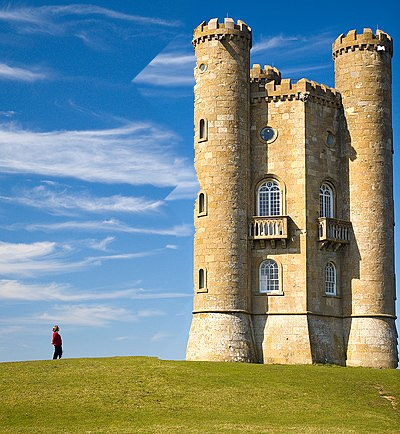

In [33]:
show_pnm('in_host.pnm')

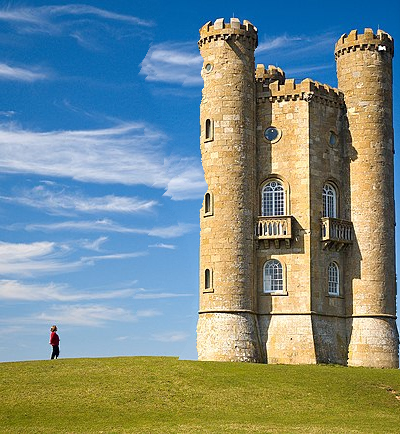

In [34]:
show_pnm('in_device1.pnm')

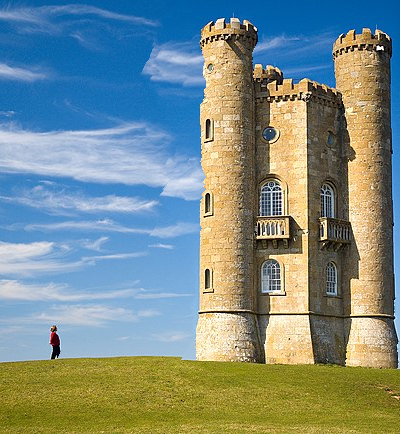

In [35]:
show_pnm('in_device2.pnm')

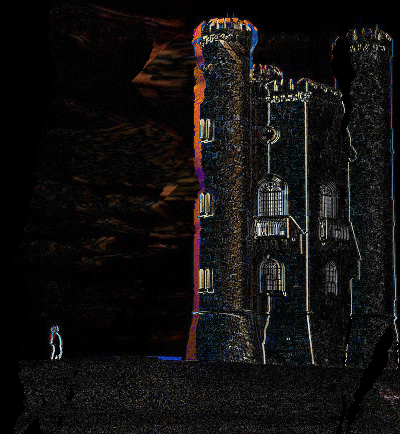

In [36]:
ImageChops.difference(show_pnm('in_host.pnm'), show_pnm('in_device2.pnm'))

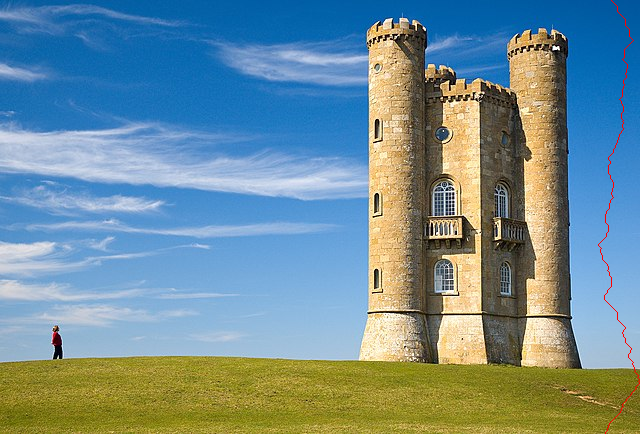

In [ ]:
show_pnm('highlight.pnm')

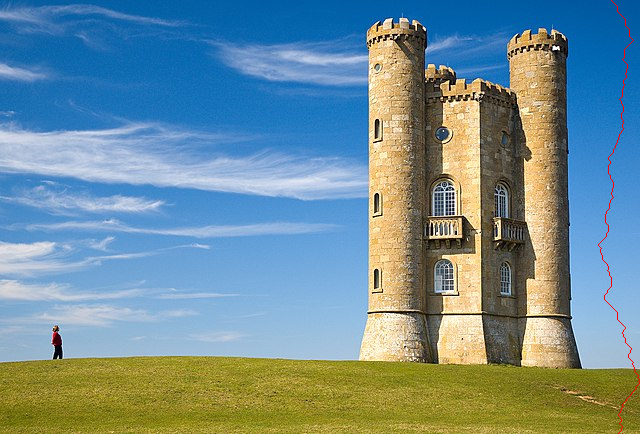

In [ ]:
show_pnm('highlight_dev.pnm')

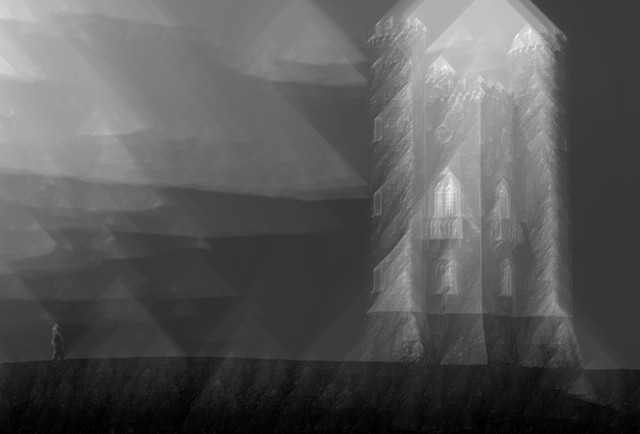

In [ ]:
show_matrix('energy_map.txt')

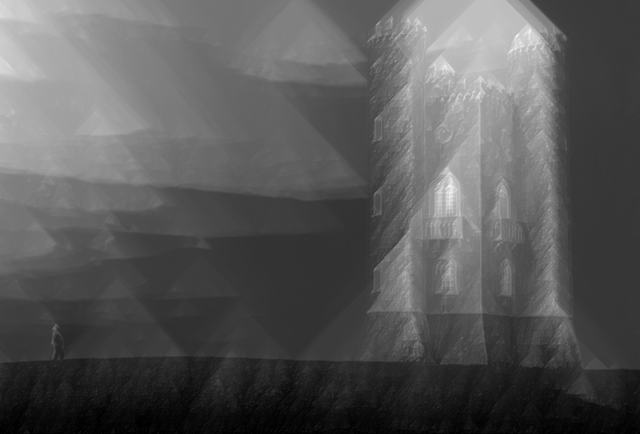

In [ ]:
show_matrix('energy_map_dev.txt')

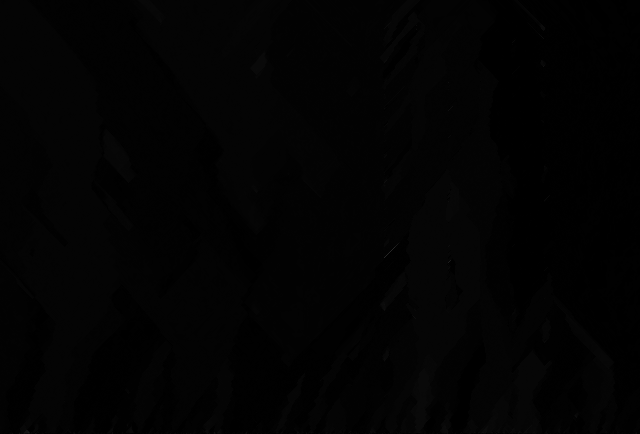

In [ ]:
diff_matrix('energy_map.txt', 'energy_map_dev.txt')

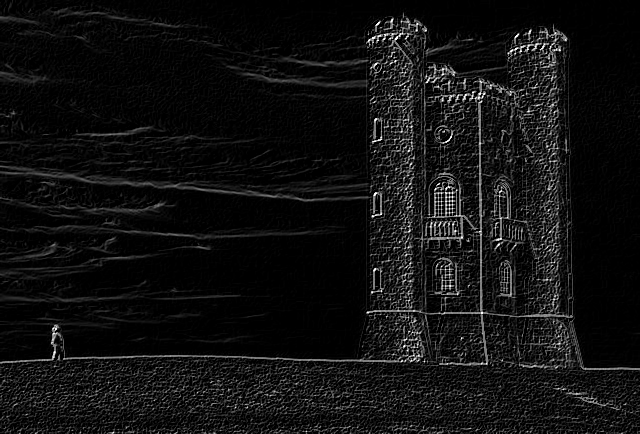

In [ ]:
show_matrix('energy.txt')

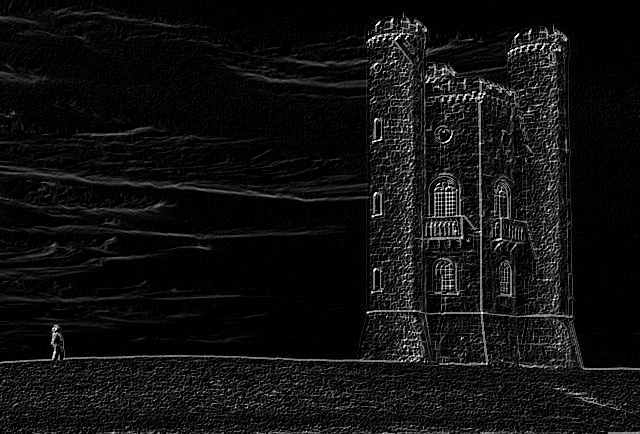

In [ ]:
show_matrix('energy_dev.txt')

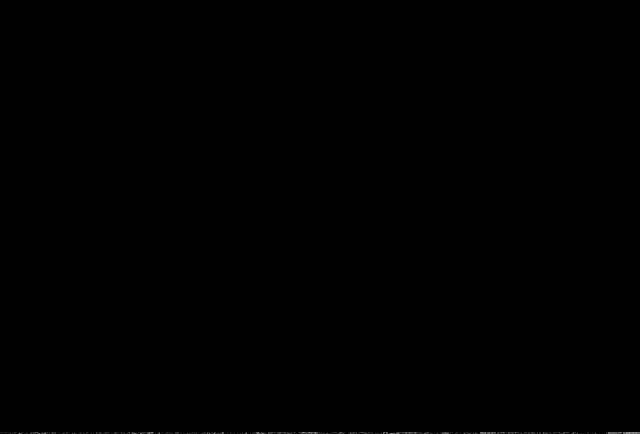

In [ ]:
diff_matrix('energy.txt', 'energy_dev.txt')

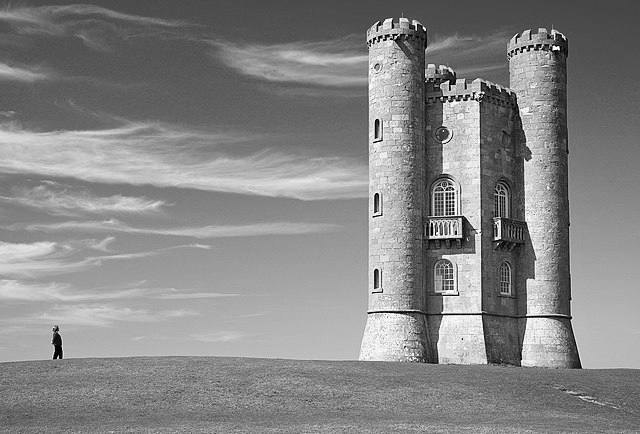

In [ ]:
show_pnm('grey_dev.pnm')

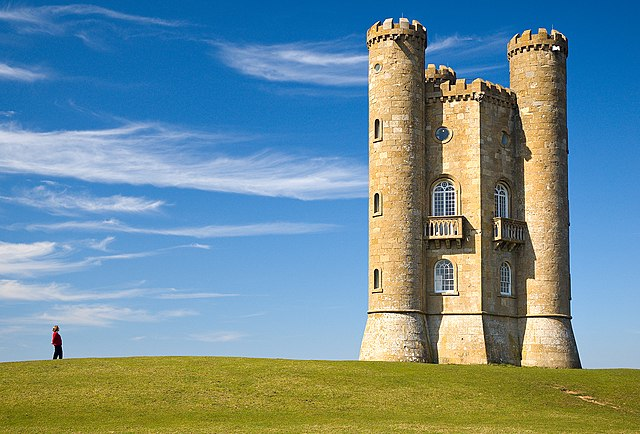

In [ ]:
show_pnm('in.pnm')